<a href="https://colab.research.google.com/github/hana-magdy/Face-Recognition/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports:


In [2]:
from PIL import Image
from numpy import asarray
from sklearn.metrics import accuracy_score
import numpy as np
import glob
import cv2
import zipfile
import  os
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


In [3]:
zip_ref = zipfile.ZipFile("archive (1).zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
 
y = []
Data_matrix = []
for i in range(1,41):
  folder = "s"
  folder+=str(i)
  y.append(i)
  files = glob.glob (folder)
  for j in range(1,11):
      file_name = folder + "/"+str(j)+".pgm"
      img = Image.open(file_name)
      data = np.array(img)
      #print(data)
      x = data.flatten()
      Data_matrix.append(x)
      #print(x.shape)
      #print("Path")
      #print(file_name)
      j=j+1
  j = 1
  i = i +1

In [5]:
Data_matrix = np.array(Data_matrix)
print("Total data:")
print(Data_matrix.shape)
print(Data_matrix)

print("Labels:")
print(y)


Total data:
(400, 10304)
[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]
Labels:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


splitting the data:


In [6]:
Testing =  Data_matrix[::2]
Training = Data_matrix[1::2]
print("Training")
print(Training)

print("Testing")
print(Testing)

Training_Labels=[]
Original_Testing_Labels=[]
for i in range(1,41):
  for j in range(1,6):
    Training_Labels.append(i)
    Original_Testing_Labels.append(i)

print("Training Labels:")
print(Training_Labels)

Training
[[ 60  60  62 ...  32  34  34]
 [ 63  53  35 ...  41  10  24]
 [ 43  50  41 ... 158 153 169]
 ...
 [123 121 126 ...  40  35  42]
 [125 119 124 ...  36  39  40]
 [125 124 124 ...  36  35  34]]
Testing
[[ 48  49  45 ...  47  46  46]
 [ 39  44  53 ...  29  26  29]
 [ 64  76  80 ...  35  37  39]
 ...
 [128 125 125 ...  85  90  84]
 [129 127 133 ...  93  93  93]
 [119 120 120 ...  89  94  85]]
Training Labels:
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32

### **PCA function:**


In [7]:
def PCA(Training,Testing,Alpha):
  MeanMatrix=np.array(Training).mean(axis=0)
  print("Mean Matrix: ")
  print(MeanMatrix)
  print("Mean Matrix shape: ")
  print(MeanMatrix.shape)
  print("\n *********************************** \n")
  print("Centred Data: ")
  Centred_Data=np.array(Training-MeanMatrix)
  print(Centred_Data)
  print("\n *********************************** \n")
  print("Covariance matrix: ")
  Covariance_Matrix=np.cov(Centred_Data.T,bias=True)
  print(Covariance_Matrix)
  print("\n *********************************** \n")
  Eigenvalues,EigenVectors=np.linalg.eigh(Covariance_Matrix)
  print("Eigenvalues: ")
  print(Eigenvalues)
  print("\n *********************************** \n")
  print("Eigenvectors: ")
  print(EigenVectors)
  print("\n *********************************** \n")
  print("Sum of total EigenValues")
  SumEigenValues=Eigenvalues.sum()
  print(SumEigenValues)
  idx = np.argsort(Eigenvalues)[::-1]
  Sorted_eigenValues= Eigenvalues[idx]
  #Sorted_eigenValues=np.diagflat(Sorted_eigenValues)
  Sorted_eigenvectors= EigenVectors[:,idx]
  FractionalSum=0 
  FractionalVariance=0
  index=0
  for i in range(0,len(Sorted_eigenValues)):
    FractionalVariance=FractionalSum / SumEigenValues
    if  FractionalVariance < Alpha :
      index=i
      FractionalSum+=Sorted_eigenValues[i]
    else:
      break
 
  print("Fractional Variance")
  print(FractionalVariance)
  print("r= ",index+1)
          

  print("\n *********************************** \n")
  Reduced_Eigenvectors=Sorted_eigenvectors[:, 0:index+1]
  Reduced_Eigenvalues= Sorted_eigenValues[0:index+1]
  print("Reduced EigenVector= ")
  print(Reduced_Eigenvectors)
  print(Reduced_Eigenvectors.shape)
  print("\n *********************************** \n")

  Reduced_EigenvectorsT=np.transpose(Reduced_Eigenvectors)
  print("projection matrix= ")
  print(Reduced_EigenvectorsT) 

  print("\n *********************************** \n")
  print("Projected Training matrix = ")
  projected_training=np.dot(Centred_Data,Reduced_Eigenvectors)
  print(projected_training)

  print("\n *********************************** \n")
  Temp_Testing=np.subtract(Testing,Testing.mean(axis=0))
  print("Testing",Testing)
  print("Temp_Testing",Temp_Testing)
  projected_testing=np.dot(Temp_Testing,Reduced_Eigenvectors)
  print("Projected Testing matrix = ")
  print(projected_testing)
  print("\n *********************************** \n")
 
  return projected_training,projected_testing,Reduced_Eigenvectors,Reduced_Eigenvalues



In [9]:
print("PCA output for Alpha=0.8 :")
projected_training08,projected_testing08,Reduced_Eigenvectors08,Reduced_Eigenvalues08=PCA(Training,Testing,0.8)

PCA output for Alpha=0.8 :
Mean Matrix: 
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
Mean Matrix shape: 
(10304,)

 *********************************** 

Centred Data: 
[[-25.12  -24.89  -23.165 ... -45.24  -40.335 -39.37 ]
 [-22.12  -31.89  -50.165 ... -36.24  -64.335 -49.37 ]
 [-42.12  -34.89  -44.165 ...  80.76   78.665  95.63 ]
 ...
 [ 37.88   36.11   40.835 ... -37.24  -39.335 -31.37 ]
 [ 39.88   34.11   38.835 ... -41.24  -35.335 -33.37 ]
 [ 39.88   39.11   38.835 ... -41.24  -39.335 -39.37 ]]

 *********************************** 

Covariance matrix: 
[[1318.8756   1299.2282   1304.6652   ... -235.7588   -126.0752
   -75.5394  ]
 [1299.2282   1295.5879   1293.30315  ... -218.1036   -112.70315
   -64.3043  ]
 [1304.6652   1293.30315  1306.107775 ... -216.9946    -99.325275
   -49.28605 ]
 ...
 [-235.7588   -218.1036   -216.9946   ... 2505.0524   1995.4546
  1882.7162  ]
 [-126.0752   -112.70315   -99.325275 ... 1995.4546   1972.392775
  1859.56105 ]
 [ -75.5394    -64.3043   

In [10]:
print("PCA output for Alpha=0.85 :")
projected_training085,projected_testing085,Reduced_Eigenvectors085,Reduced_Eigenvalues085=PCA(Training,Testing,0.85)

PCA output for Alpha=0.85 :
Mean Matrix: 
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
Mean Matrix shape: 
(10304,)

 *********************************** 

Centred Data: 
[[-25.12  -24.89  -23.165 ... -45.24  -40.335 -39.37 ]
 [-22.12  -31.89  -50.165 ... -36.24  -64.335 -49.37 ]
 [-42.12  -34.89  -44.165 ...  80.76   78.665  95.63 ]
 ...
 [ 37.88   36.11   40.835 ... -37.24  -39.335 -31.37 ]
 [ 39.88   34.11   38.835 ... -41.24  -35.335 -33.37 ]
 [ 39.88   39.11   38.835 ... -41.24  -39.335 -39.37 ]]

 *********************************** 

Covariance matrix: 
[[1318.8756   1299.2282   1304.6652   ... -235.7588   -126.0752
   -75.5394  ]
 [1299.2282   1295.5879   1293.30315  ... -218.1036   -112.70315
   -64.3043  ]
 [1304.6652   1293.30315  1306.107775 ... -216.9946    -99.325275
   -49.28605 ]
 ...
 [-235.7588   -218.1036   -216.9946   ... 2505.0524   1995.4546
  1882.7162  ]
 [-126.0752   -112.70315   -99.325275 ... 1995.4546   1972.392775
  1859.56105 ]
 [ -75.5394    -64.3043  

In [11]:
print("PCA output for Alpha=0.9:")
projected_training09,projected_testing09,Reduced_Eigenvectors09,Reduced_Eigenvalues09=PCA(Training,Testing,0.9)

PCA output for Alpha=0.9:
Mean Matrix: 
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
Mean Matrix shape: 
(10304,)

 *********************************** 

Centred Data: 
[[-25.12  -24.89  -23.165 ... -45.24  -40.335 -39.37 ]
 [-22.12  -31.89  -50.165 ... -36.24  -64.335 -49.37 ]
 [-42.12  -34.89  -44.165 ...  80.76   78.665  95.63 ]
 ...
 [ 37.88   36.11   40.835 ... -37.24  -39.335 -31.37 ]
 [ 39.88   34.11   38.835 ... -41.24  -35.335 -33.37 ]
 [ 39.88   39.11   38.835 ... -41.24  -39.335 -39.37 ]]

 *********************************** 

Covariance matrix: 
[[1318.8756   1299.2282   1304.6652   ... -235.7588   -126.0752
   -75.5394  ]
 [1299.2282   1295.5879   1293.30315  ... -218.1036   -112.70315
   -64.3043  ]
 [1304.6652   1293.30315  1306.107775 ... -216.9946    -99.325275
   -49.28605 ]
 ...
 [-235.7588   -218.1036   -216.9946   ... 2505.0524   1995.4546
  1882.7162  ]
 [-126.0752   -112.70315   -99.325275 ... 1995.4546   1972.392775
  1859.56105 ]
 [ -75.5394    -64.3043    

In [12]:
print("PCA output for Alpha=0.95 :")
projected_training095,projected_testing095,Reduced_Eigenvectors095,Reduced_Eigenvalues095=PCA(Training,Testing,0.95)

PCA output for Alpha=0.95 :
Mean Matrix: 
[85.12  84.89  85.165 ... 77.24  74.335 73.37 ]
Mean Matrix shape: 
(10304,)

 *********************************** 

Centred Data: 
[[-25.12  -24.89  -23.165 ... -45.24  -40.335 -39.37 ]
 [-22.12  -31.89  -50.165 ... -36.24  -64.335 -49.37 ]
 [-42.12  -34.89  -44.165 ...  80.76   78.665  95.63 ]
 ...
 [ 37.88   36.11   40.835 ... -37.24  -39.335 -31.37 ]
 [ 39.88   34.11   38.835 ... -41.24  -35.335 -33.37 ]
 [ 39.88   39.11   38.835 ... -41.24  -39.335 -39.37 ]]

 *********************************** 

Covariance matrix: 
[[1318.8756   1299.2282   1304.6652   ... -235.7588   -126.0752
   -75.5394  ]
 [1299.2282   1295.5879   1293.30315  ... -218.1036   -112.70315
   -64.3043  ]
 [1304.6652   1293.30315  1306.107775 ... -216.9946    -99.325275
   -49.28605 ]
 ...
 [-235.7588   -218.1036   -216.9946   ... 2505.0524   1995.4546
  1882.7162  ]
 [-126.0752   -112.70315   -99.325275 ... 1995.4546   1972.392775
  1859.56105 ]
 [ -75.5394    -64.3043  

In [13]:
def Label_prediction(k,ProjectedTraining , ProjectedTesting):

  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(ProjectedTraining,np.array(Training_Labels))
  Tested_Labels= model.predict(ProjectedTesting)

  return Tested_Labels

In [14]:
print("Tested labels for 0.8=")
Tested_Labels08=Label_prediction (1,projected_training08,projected_testing08)
print(Tested_Labels08)

print("\n *********************************** \n")

print("Tested labels for 0.85=")
Tested_Labels085=Label_prediction (1,projected_training085,projected_testing085)
print(Tested_Labels085)

print("\n *********************************** \n")

print("Tested labels for 0.9=")
Tested_Labels09=Label_prediction (1,projected_training09,projected_testing09)
print(Tested_Labels09)

print("\n *********************************** \n")

print("Tested labels for 0.95=")
Tested_Labels095=Label_prediction (1,projected_training095,projected_testing095)
print(Tested_Labels095)

Tested labels for 0.8=
[16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 36 20
 20  3 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 21 31 32 32 32  2 32 33 33 33 33 33 34 34 34
 34 34 40 15 35 35 35  7 36  7 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40  5  5  5]

 *********************************** 

Tested labels for 0.85=
[16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 36 20
 20  3 20 2

In [15]:
 print("Accuracy of 0.8 =")
 Accuracy08 = accuracy_score(Original_Testing_Labels, Tested_Labels08)
 print(Accuracy08*100,"%")

 print("Accuracy of 0.85 =")
 Accuracy085 = accuracy_score(Original_Testing_Labels, Tested_Labels085)
 print(Accuracy085*100,"%")  

 print("Accuracy of 0.9 =")
 Accuracy09 = accuracy_score(Original_Testing_Labels, Tested_Labels09)
 print(Accuracy09*100,"%")

 print("Accuracy of 0.95 =")
 Accuracy095= accuracy_score(Original_Testing_Labels, Tested_Labels095)
 print(Accuracy095*100,"%")

Accuracy of 0.8 =
93.0 %
Accuracy of 0.85 =
93.5 %
Accuracy of 0.9 =
94.0 %
Accuracy of 0.95 =
93.5 %



### **LDA**





In [ ]:
#1
ListOfClasses=[]
for i in range(0,40):
  ListOfClasses.append(Training[5*i:5*(i+1),:])

  
  
#print(ListOfClasses)
#2
ListOfMeans=[]
for i in range(0,40):
  ListOfMeans.append(np.array(ListOfClasses[i]).mean(axis=0))

print("List of means length : ",len(ListOfMeans))  
print("List of means : ",ListOfMeans)

#3
OverallMean=np.array(Training).mean(axis=0)
print("Overall mean =",OverallMean)
Sb=np.zeros((10304,10304))
for i in range(0,40):
  expression=(np.outer((ListOfMeans[i]-OverallMean),np.array((ListOfMeans[i]-OverallMean)).T))
  Sb=Sb+ expression
Sb=5*Sb  
print("sb= ",Sb)

#4
ListOfCentredData=[]
for i in range(0,40):
  ListOfCentredData.append(ListOfClasses[i]-np.array(ListOfMeans[i]).T)

print("List of centred data ",ListOfCentredData)

#5
ListOfScatterMatrcies=np.zeros((10304,10304))
for j in range(0,40):
 expression=np.dot(np.array(ListOfCentredData[j]).T,np.array(ListOfCentredData[j]))
 ListOfScatterMatrcies=ListOfScatterMatrcies+expression
   
print("S= ",ListOfScatterMatrcies.shape)
print(ListOfScatterMatrcies)




List of means length :  40
List of means :  [array([48.8, 48. , 40.6, ..., 62.2, 56. , 59.4]), array([35.2, 35.8, 35.6, ..., 71.8, 71.6, 71.6]), array([105.2, 104. , 107.4, ...,  50. ,  48.4,  50. ]), array([118.6, 118.8, 118. , ...,  70.8,  69.4,  69.2]), array([128.8, 129. , 127.8, ...,  72.6,  71.8,  72.8]), array([153.4, 152.8, 152.2, ..., 103.6, 103.8, 103. ]), array([56.6, 57.2, 57.6, ..., 64. , 65. , 65.4]), array([122. , 118.6, 119.8, ...,  59.8,  56.8,  59. ]), array([109.8, 111.4, 110.4, ...,  84. ,  82.4,  83.2]), array([134.2, 130. , 132.6, ...,  26. ,  30.4,  32.4]), array([46.4, 47. , 46.4, ..., 34. , 34. , 37.6]), array([104.6, 106. , 105.4, ...,  38.8,  40.6,  33. ]), array([107.6, 109.2, 108. , ...,  20.6,  25.8,  23.8]), array([ 45.8,  47.2,  46.8, ..., 142.2, 142.6, 123.4]), array([72.4, 72.2, 71.4, ..., 71.8, 49. , 54. ]), array([60. , 59. , 61.4, ..., 64.6, 64.6, 60.4]), array([49.4, 49.6, 51.4, ..., 42.2, 46.8, 46. ]), array([121.2, 120.6, 122.2, ...,  73.6,  74. 

In [ ]:
inv=np.linalg.inv(ListOfScatterMatrcies)

print(inv)

[[ 2.41927224e+10  2.06323249e+09  2.24921887e+10 ... -1.24110945e+10
   1.80377734e+10  1.23427588e+10]
 [-1.08670945e+10  1.95704296e+10 -5.58047861e+08 ...  7.12372403e+09
  -2.98490247e+10  1.64346660e+10]
 [ 2.54571078e+10 -2.15524699e+10  1.30523468e+10 ... -1.79148265e+10
   5.07431202e+10 -1.98012229e+10]
 ...
 [ 3.64317151e+09 -6.67123128e+08  1.85670327e+09 ... -2.08734659e+09
   4.75558194e+09 -1.04831039e+09]
 [-4.19315811e+09  4.87576934e+08 -2.83395492e+09 ...  2.57987819e+09
  -6.18200646e+09 -1.41038835e+07]
 [-1.87594061e+09 -8.23215873e+08 -1.47503002e+09 ...  6.41637579e+08
   3.90041512e+08 -5.22071836e+08]]


In [ ]:
s_1_b=np.dot(inv,Sb)
print(s_1_b)




[[ 6.15710810e+16  6.24487373e+16  6.25255872e+16 ...  9.73264195e+16
   8.30177818e+16  7.46951064e+16]
 [ 2.31565526e+16  2.33011944e+16  2.30146324e+16 ... -6.04961155e+15
   4.57065049e+15  4.69904593e+15]
 [ 7.80462056e+15  8.03029036e+15  8.48628944e+15 ...  7.34567308e+16
   4.97526465e+16  4.59756660e+16]
 ...
 [ 4.25240955e+15  4.29850729e+15  4.36494750e+15 ...  1.01296847e+16
   7.63215828e+15  6.75018559e+15]
 [-8.10563474e+15 -8.26469631e+15 -8.18659062e+15 ... -1.34370133e+16
  -1.03786604e+16 -9.20309461e+15]
 [-2.74238517e+15 -2.82355977e+15 -2.80150292e+15 ... -6.87271818e+15
  -6.41174803e+15 -5.87995514e+15]]


In [ ]:
EigenValues,EigenVector=np.linalg.eig(s_1_b)
print(EigenValues.shape)
print(EigenValues)
print(EigenVector.shape)
print(EigenVector)

(10304,)
[-1.33379691e+17+2.35212910e+17j -1.33379691e+17-2.35212910e+17j
  3.55928397e+16+4.37523365e+15j ...  5.83364329e+00+0.00000000e+00j
  4.63421413e+00+2.35230457e+00j  4.63421413e+00-2.35230457e+00j]
(10304, 10304)
[[ 0.06796795+0.04889116j  0.06796795-0.04889116j  0.06339464-0.01259544j
  ... -0.0041086 +0.j         -0.00285123+0.00192535j
  -0.00285123-0.00192535j]
 [-0.0431872 +0.01640728j -0.0431872 -0.01640728j -0.07783721-0.01107302j
  ... -0.00751196+0.j         -0.0051074 +0.00340213j
  -0.0051074 -0.00340213j]
 [ 0.10278503+0.j          0.10278503-0.j          0.00874002+0.00166072j
  ...  0.00537814+0.j          0.00572763+0.00240431j
   0.00572763-0.00240431j]
 ...
 [ 0.01251237+0.00291016j  0.01251237-0.00291016j  0.00770507-0.00052777j
  ... -0.00252723+0.j         -0.00295443-0.00149955j
  -0.00295443+0.00149955j]
 [-0.01448312-0.00683645j -0.01448312+0.00683645j -0.0012238 +0.00181377j
  ...  0.00507315+0.j          0.00543857-0.00152534j
   0.00543857+0.0015253

In [ ]:
idx = np.argsort(EigenValues)[::-1]
Sorted_eigenValues= EigenValues[idx]
Sorted_eigenvectors= EigenVector[:,idx]

Sorted_eigenvectors = np.real(Sorted_eigenvectors)

Reduced_Dimensions=Sorted_eigenvectors[0:39]


LDAProjectionMatrix=Reduced_Dimensions.T
print(LDAProjectionMatrix)


[[ 0.06339464 -0.07783721  0.00874002 ... -0.04256798  0.00496786
  -0.02397754]
 [ 0.06339464 -0.07783721  0.00874002 ... -0.04256798  0.00496786
  -0.02397754]
 [ 0.12647414  0.02519294  0.01549203 ... -0.05537255  0.03283056
   0.0273926 ]
 ...
 [-0.08452799 -0.04192713  0.03988404 ... -0.01565011 -0.05036013
   0.00550493]
 [ 0.06796795 -0.0431872   0.10278503 ...  0.024766   -0.00689575
  -0.03290825]
 [ 0.06796795 -0.0431872   0.10278503 ...  0.024766   -0.00689575
  -0.03290825]]


In [ ]:
LDAProjectedTraining=np.dot(Training,LDAProjectionMatrix)
print(LDAProjectedTraining)
print(LDAProjectedTraining.shape)
LDAProjectedTesting=np.dot(Testing,LDAProjectionMatrix)
print(LDAProjectedTesting)
print(LDAProjectedTesting.shape)

[[ 299.92214846  698.06440047  274.55874618 ... -286.40771801
   312.52754888  223.04506633]
 [ 557.23003733  575.56842816  323.89172715 ... -313.21416851
   305.80976491  248.75220113]
 [ 497.49798     598.52706639  436.95196236 ... -350.09548174
   290.31435377  331.62351337]
 ...
 [ 227.84961435  595.20891583  200.69381843 ... -210.35921793
   204.79214152  240.37970727]
 [ 271.68947289  527.64144227  247.3312172  ... -244.80589451
   159.71465527  299.59839076]
 [ 181.88274859  535.39494313  252.63662626 ... -179.42759912
   192.26080921  227.40234874]]
(200, 39)
[[ 226.88922356  583.78917201  259.7764087  ... -295.7710077
   324.24195892  307.49225897]
 [ 184.9001766   629.95962427  283.10452642 ... -291.59644309
   345.28173022  283.75934956]
 [ 353.27287968  598.70284764  287.75343139 ... -296.73656023
   313.65637064  190.08830599]
 ...
 [ 310.29996709  541.57706027  352.44662073 ... -271.8854822
   211.72443877  215.88122357]
 [ 349.35055011  538.54585794  239.96173121 ... -27

In [ ]:
LDAPredictedLabels=Label_prediction(1,LDAProjectedTraining,LDAProjectedTesting)
print(LDAPredictedLabels)


[16  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10  8 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 28 15 15
 15 15 15 16 16 16 16 19 17 17 17 17 17 18 18 18 18 18 19 19 19 19  2 20
 20 20  4 20 21 21 21 21 21 22 22 22 22 22 23 38 29 23 23 24 24 36 24 24
 25 25 25 25 25 26 12 26 26 26 27 27 27 27 27 28 28 28 28 37 29 29 29 29
 29 30 38 30 30 30 31 31 31 33 30  5  5 32  7 32 33 33 33 21 33 34 34 34
 34 34  9 35 35 35  5 36 36  7 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 37 40  5  5  5]


In [ ]:
LDA_Accuracy1 = accuracy_score(Original_Testing_Labels, LDAPredictedLabels)
print("Accuracy1 = ",LDA_Accuracy1*100, "%")

Accuracy1 =  87.5 %


### **Classfier tunning**

In [ ]:
AccuracyLDA=[]

AccuracyLDA.append([1,LDA_Accuracy1])

LDAPredictedLabels3=Label_prediction(3,LDAProjectedTraining,LDAProjectedTesting)
LDA_Accuracy3 = accuracy_score(Original_Testing_Labels, LDAPredictedLabels3)
AccuracyLDA.append([3,LDA_Accuracy3])
print(LDAPredictedLabels3)

print("\n *********************************** \n")

LDAPredictedLabels5=Label_prediction(5,LDAProjectedTraining,LDAProjectedTesting)
LDA_Accuracy5 = accuracy_score(Original_Testing_Labels, LDAPredictedLabels5)
AccuracyLDA.append([5,LDA_Accuracy5])
print(LDAPredictedLabels5)

print("\n *********************************** \n")

LDAPredictedLabels7=Label_prediction(7,LDAProjectedTraining,LDAProjectedTesting)
LDA_Accuracy7 = accuracy_score(Original_Testing_Labels, LDAPredictedLabels7)
AccuracyLDA.append([7,LDA_Accuracy7])
print(LDAPredictedLabels7)



NameError: ignored

In [ ]:

print (tabulate(AccuracyLDA, headers=["K", "Accuracy"]))


  K    Accuracy
---  ----------
  1       0.805
  3       0.71
  5       0.695
  7       0.655


In [ ]:
PCAPredictedLabels08=[]
PCAPredictedLabels085=[]
PCAPredictedLabels09=[]
PCAPredictedLabels095=[]
PCA_Accuracy08=[]
PCA_Accuracy085=[]
PCA_Accuracy09=[]
PCA_Accuracy095=[]
K=[1,3,5,7]
for i in range(0,4):
  PCAPredictedLabels08.append(Label_prediction(K[i],projected_training08,projected_testing08))
  PCAPredictedLabels085.append(Label_prediction(K[i],projected_training085,projected_testing085))
  PCAPredictedLabels09.append(Label_prediction(K[i],projected_training09,projected_testing09))
  PCAPredictedLabels095.append(Label_prediction(K[i],projected_training095,projected_testing095))
for i in range(0,4):
  PCA_Accuracy08.append([K[i],accuracy_score(Original_Testing_Labels, PCAPredictedLabels08[i])])
  PCA_Accuracy085.append([K[i],accuracy_score(Original_Testing_Labels, PCAPredictedLabels085[i])])
  PCA_Accuracy09.append([K[i],accuracy_score(Original_Testing_Labels, PCAPredictedLabels09[i])])
  PCA_Accuracy095.append([K[i],accuracy_score(Original_Testing_Labels, PCAPredictedLabels095[i])])





print("Classifying accuracy with respect to k for PCA (Alpha=0.8) \n")
print (tabulate(PCA_Accuracy08, headers=["K", "Accuracy"]))

print("\n Classifying accuracy with respect to k for PCA (Alpha=0.85) \n")
print (tabulate(PCA_Accuracy085, headers=["K", "Accuracy"]))

print("\n Classifying accuracy with respect to k for PCA (Alpha=0.9) \n")
print (tabulate(PCA_Accuracy09, headers=["K", "Accuracy"]))

print("\n Classifying accuracy with respect to k for PCA (Alpha=0.95) \n")
print (tabulate(PCA_Accuracy095, headers=["K", "Accuracy"]))

Classifying accuracy with respect to k for PCA (Alpha=0.8) 

  K    Accuracy
---  ----------
  1       0.93
  3       0.855
  5       0.805
  7       0.78

 Classifying accuracy with respect to k for PCA (Alpha=0.85) 

  K    Accuracy
---  ----------
  1       0.94
  3       0.855
  5       0.83
  7       0.775

 Classifying accuracy with respect to k for PCA (Alpha=0.9) 

  K    Accuracy
---  ----------
  1       0.945
  3       0.85
  5       0.815
  7       0.755

 Classifying accuracy with respect to k for PCA (Alpha=0.95) 

  K    Accuracy
---  ----------
  1       0.935
  3       0.845
  5       0.815
  7       0.74


### **Non-Faces/Faces**

In [9]:
FacesDataset=Data_matrix[0:100,:]
print(FacesDataset.shape)

zip_ref = zipfile.ZipFile("non-faces.zip", "r")
zip_ref.extractall()
zip_ref.close()

NonFacesDataset=[]

for i in os.listdir("/content/non-faces pgm"):
      file_name = "/content/non-faces pgm/"+i
      img = Image.open(file_name)
      data = np.array(img)
      x = data.flatten()
      NonFacesDataset.append(x)
     # print(x.shape)
      #print("Path")
      #print(file_name)
 



(100, 10304)


In [ ]:
FaceTesting = np.concatenate((Testing[0:50], NonFacesDataset[0:50]), axis=0)

FaceTraining = np.concatenate((Training[0:50], NonFacesDataset[50:100]), axis=0)

print("Training")
print(FaceTraining)
print("Shape")
print(FaceTraining.shape)

print("Testing")
print(FaceTesting)
print("Shape")
print(FaceTesting.shape)

Faces_NonFaces_Labels = np.concatenate((np.zeros(50), np.ones(50)), axis=0)

print(Faces_NonFaces_Labels)



In [ ]:
projected_training08_2,projected_testing08_2,Reduced_Eigenvectors08_2,Reduced_Eigenvalues08_2 =PCA(FaceTraining,FaceTesting,0.8)

In [ ]:
projected_training085_2,projected_testing085_2,Reduced_Eigenvectors085_2,Reduced_Eigenvalues085_2 =PCA(FaceTraining,FaceTesting,0.85)

In [ ]:
projected_training09_2,projected_testing09_2,Reduced_Eigenvectors09_2,Reduced_Eigenvalues09_2 =PCA(FaceTraining,FaceTesting,0.9)

In [ ]:
projected_training095_2,projected_testing095_2,Reduced_Eigenvectors095_2,Reduced_Eigenvalues095_2 =PCA(FaceTraining,FaceTesting,0.95)

In [15]:
def Label_prediction2(k,ProjectedTraining , ProjectedTesting):

  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(ProjectedTraining,np.array(Faces_NonFaces_Labels))
  Tested_Labels= model.predict(ProjectedTesting)

  return Tested_Labels

In [16]:
print("Tested labels for 0.8=")
Tested_Labels08_2=Label_prediction2 (1,projected_training08_2,projected_testing08_2)
print(Tested_Labels08_2)

print(" ***********************************")
print("Tested labels for 0.85=")
Tested_Labels085_2=Label_prediction2 (1,projected_training085_2,projected_testing085_2)
print(Tested_Labels085_2)

print(" ***********************************")

print("Tested labels for 0.9=")
Tested_Labels09_2=Label_prediction2 (1,projected_training09_2,projected_testing09_2)
print(Tested_Labels09_2)

print(" ***********************************")

print("Tested labels for 0.95=")
Tested_Labels095_2=Label_prediction2 (1,projected_training095_2,projected_testing095_2)
print(Tested_Labels095_2)

print(" ***********************************")

Tested labels for 0.8=
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1.]
 ***********************************
Tested labels for 0.85=
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1.]
 ***********************************
Tested labels for 0.9=
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 

In [17]:
 print("Accuracy of 0.8 =")
 Accuracy08_2 = accuracy_score(Faces_NonFaces_Labels, Tested_Labels08_2)
 print(Accuracy08_2*100,"%")

 print("Accuracy of 0.85 =")
 Accuracy085_2 = accuracy_score(Faces_NonFaces_Labels, Tested_Labels085_2)
 print(Accuracy085_2*100,"%")

 print("Accuracy of 0.9 =")
 Accuracy09_2 = accuracy_score(Faces_NonFaces_Labels, Tested_Labels09_2)
 print(Accuracy09_2*100,"%")

 print("Accuracy of 0.95 =")
 Accuracy095_2 = accuracy_score(Faces_NonFaces_Labels, Tested_Labels095_2)
 print(Accuracy095_2*100,"%")

Accuracy of 0.8 =
90.0 %
Accuracy of 0.85 =
89.0 %
Accuracy of 0.9 =
85.0 %
Accuracy of 0.95 =
85.0 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


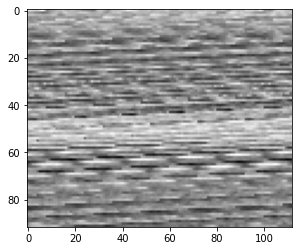

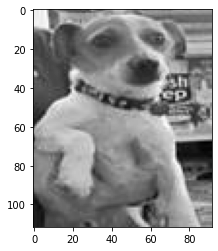

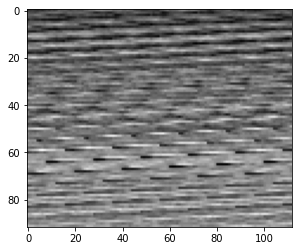

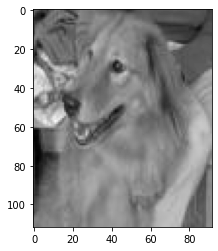

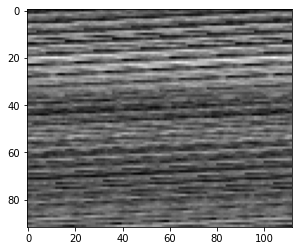

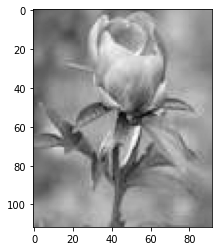

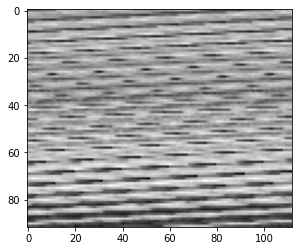

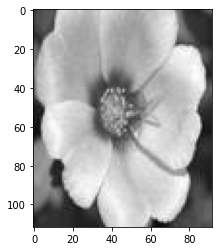

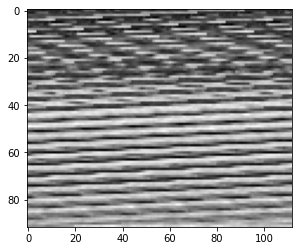

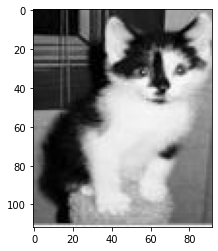

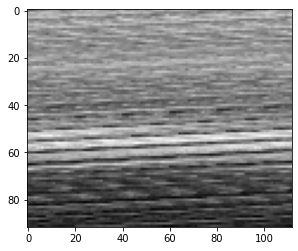

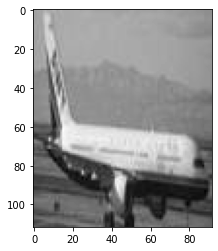

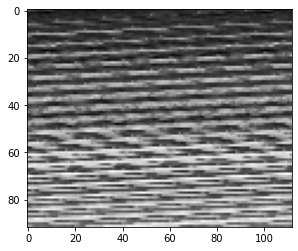

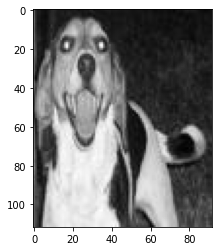

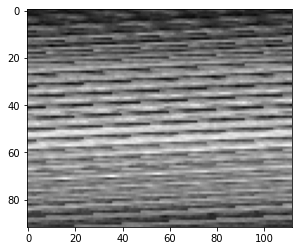

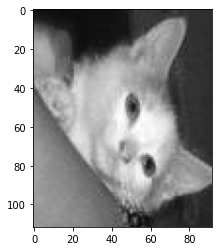

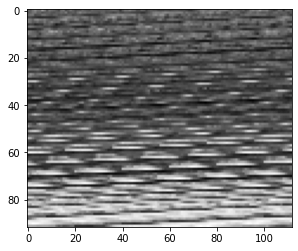

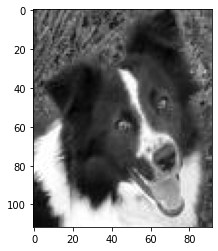

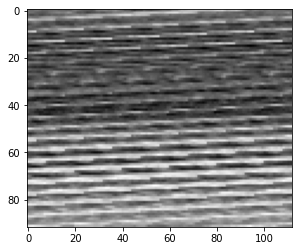

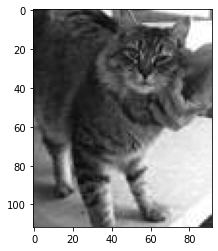

<Figure size 432x288 with 0 Axes>

In [24]:
Reconstruction08 = (np.dot(projected_training08_2,Reduced_Eigenvectors08_2.T))+FaceTraining.mean(axis=0)

for i in range(len(Faces_NonFaces_Labels)):
 if Tested_Labels08_2[i] != Faces_NonFaces_Labels[i]:
    data=Reconstruction08[i]
    data = np.reshape(data, (92, 112))
    plt.imshow(data, cmap='gray');
    plt.figure()
    plt.imshow(FaceTraining[i].reshape(112,92), cmap='gray');
    plt.figure()
    



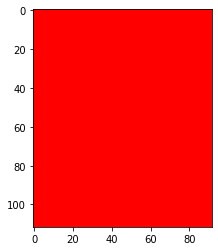